In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [7]:
def generate_data(num_samples):
    
    num_samples = 100
    X = np.random.uniform(0,1,num_samples)
    X = np.sort(X,axis=0).reshape(-1,1)
    noise = np.random.uniform(-0.1,num_samples)
    y = np.sin(2 * np.pi * X) +noise
    
    return X,y

x, y =generate_data(num_samples=100)
print(x.shape)

(100, 1)


In [11]:
class RBF:
  
  def __init__(self,feature_dim,hidden_dim):
    
    self.sigma = np.ones((feature_dim,hidden_dim))
    self.w = np.ones((hidden_dim,feature_dim))
    self.mo = np.zeros((feature_dim,hidden_dim))


  def init_centers(self,x):
    
    kmeans = KMeans(n_clusters = 5, random_state = 0, n_init="auto").fit(x)
    self.mo = kmeans.cluster_centers_.T

  def forward(self,x):
    
    self.h = np.exp(-((x-self.mo)/self.sigma)**2)
    self.yh = self.h@self.w
    return self.yh

  def grad(self,x,y):
    
     self.forward(x)
     self.e_mo = np.sum(((self.yh-y)@self.w.T)*self.h*(2*(x-self.mo))/(self.sigma**2),axis = 0)
     self.e_sig = np.sum(((self.yh-y)@self.w.T)*self.h*(2*((x-self.mo)**2))/(self.sigma**3),axis = 0)



  def step(self,x,y):

    self.mo -= self.e_mo
    self.sigma -= self.e_sig
    self.forward(x)
    self.w =np.linalg.pinv(self.h)@y

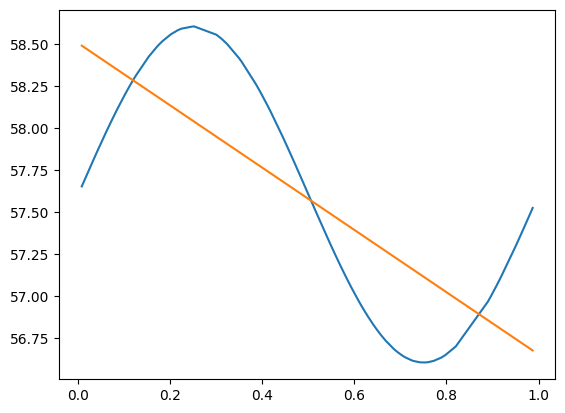

In [12]:
model_1 = RBF(1,5)
model_1.init_centers(x)
for i in range(10000):
  model_1.grad(x,y)
  model_1.step(x,y)

plt.plot(x,y)
plt.plot(x,model_1.forward(x))